In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
import math

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from scipy.stats import zscore

In [ ]:
df= pd.read_csv('/content/insurance_data.csv')

In [ ]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [ ]:
ft_cn = ['claim','bmi','bloodpressure']
zscr = zscore(df[ft_cn])
zscr

,claim,bmi,bloodpressure
0,-1.002130,-1.223525,-0.276233
1,-1.001334,-0.093203,-0.626175
2,-1.000968,0.431004,-1.063604
3,-1.000930,0.496530,-1.238575
4,-1.000879,0.562056,0.511138
...,...,...,...
1335,3.459921,0.791396,-0.538690
1336,3.743741,1.217315,2.260852
1337,3.863553,0.627582,-0.276233
1338,4.075982,-0.044059,1.036052


In [ ]:
azscr = np.abs(zscr)
f_e = (azscr < 3).all(axis=1) | df['claim'].isna()

In [ ]:
df = df[f_e]

In [ ]:
azscr

,claim,bmi,bloodpressure
0,1.002130,1.223525,0.276233
1,1.001334,0.093203,0.626175
2,1.000968,0.431004,1.063604
3,1.000930,0.496530,1.238575
4,1.000879,0.562056,0.511138
...,...,...,...
1335,3.459921,0.791396,0.538690
1336,3.743741,1.217315,2.260852
1337,3.863553,0.627582,0.276233
1338,4.075982,0.044059,1.036052


In [ ]:
f_e

0        True
1        True
2        True
3        True
4        True
        ...  
1335    False
1336    False
1337    False
1338    False
1339    False
Length: 1340, dtype: bool

In [ ]:
df.isna().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [ ]:
df['claim'].describe()

count     1296.000000
mean     12394.159923
std      11111.450462
min       1121.870000
25%       4639.590000
50%       9018.095000
75%      14475.592500
max      48970.250000
Name: claim, dtype: float64

In [ ]:
y = df['claim']
x= df.drop(columns=['claim','PatientID','index'])

In [ ]:
xmean = x['age'].mean()
x['age']=x['age'].fillna(xmean)
x['male']=x['gender']=='male'
x['smoker']=x['smoker']=='Yes'
x['diabetic']=x['diabetic']=='Yes'
x['northeast']=x['region']=='northeast'
x['southeast']=x['region']=='southeast'
x['northwest']=x['region']=='northwest'
x['southwest']=x['region']=='southwest'
x=x.drop(columns=['gender','region'])

In [ ]:
p = x.copy(deep=True)
p['claim']=y.values
p.head()

,age,bmi,bloodpressure,diabetic,children,smoker,male,northeast,southeast,northwest,southwest,claim
0,39.000000,23.2,91,True,0,False,True,False,True,False,False,1121.87
1,24.000000,30.1,87,False,0,False,True,False,True,False,False,1131.51
2,38.029435,33.3,82,True,0,False,True,False,True,False,False,1135.94
3,38.029435,33.7,80,False,0,False,True,False,False,True,False,1136.40
4,38.029435,34.1,100,False,0,False,True,False,False,True,False,1137.01


<Axes: >

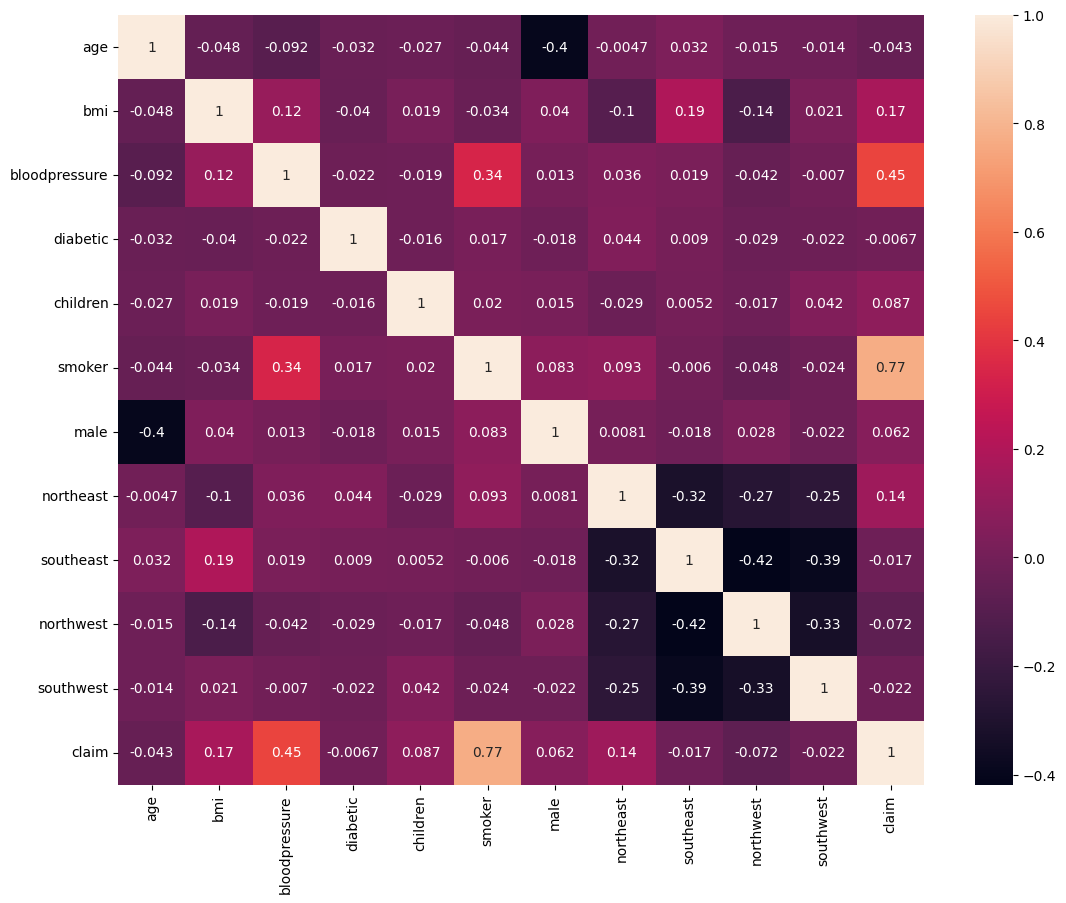

In [ ]:
fig,ax = plt.subplots(figsize=(13,10))
sns.heatmap(p.corr(),annot=True,ax=ax)

In [ ]:
x.head()

,age,bmi,bloodpressure,diabetic,children,smoker,male,northeast,southeast,northwest,southwest
0,39.000000,23.2,91,True,0,False,True,False,True,False,False
1,24.000000,30.1,87,False,0,False,True,False,True,False,False
2,38.029435,33.3,82,True,0,False,True,False,True,False,False
3,38.029435,33.7,80,False,0,False,True,False,False,True,False
4,38.029435,34.1,100,False,0,False,True,False,False,True,False


In [ ]:
y.head()

0    1121.87
1    1131.51
2    1135.94
3    1136.40
4    1137.01
Name: claim, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2, random_state=20)

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))

Mean Squared Error: 38940039.30064407


In [ ]:
print("Root Mean Squared Error", math.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared Error 6240.195453721307


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

0.6968244773727741

In [ ]:
model.coef_

array([ 2.37971619e+01,  3.24426725e+02,  2.18408189e+02, -1.91746142e+02,
        6.45753712e+02,  2.04943861e+04,  7.77115723e+00,  9.63298574e+03,
        6.47484058e+03,  6.94142787e+03,  7.24094045e+03])

In [ ]:
y_test.index

Index([ 131, 1045,  310,  698, 1057,  140, 1308,  971,  587,  340,
       ...
        770,  677, 1274, 1179,  675,  910,  941,  368, 1025,  336],
      dtype='int64', length=260)

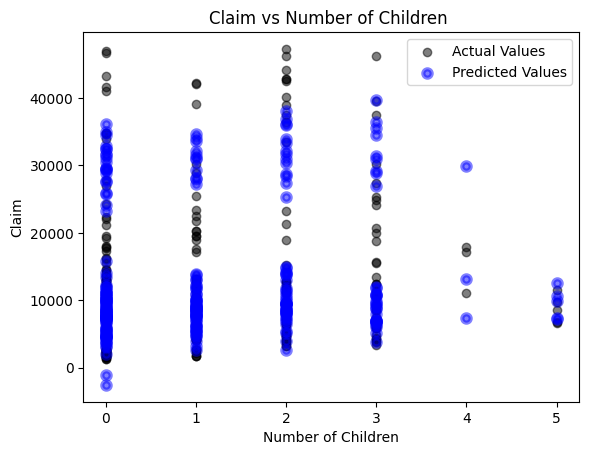

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_test['children'], y_test, color="black",alpha=0.5)
plt.scatter(x_test['children'], y_pred, color="blue", linewidth=3,alpha=0.5)
plt.ylabel('Claim')
plt.xlabel('Number of Children')
plt.title("Claim vs Number of Children ")
plt.legend(["Actual Values" , "Predicted Values"])

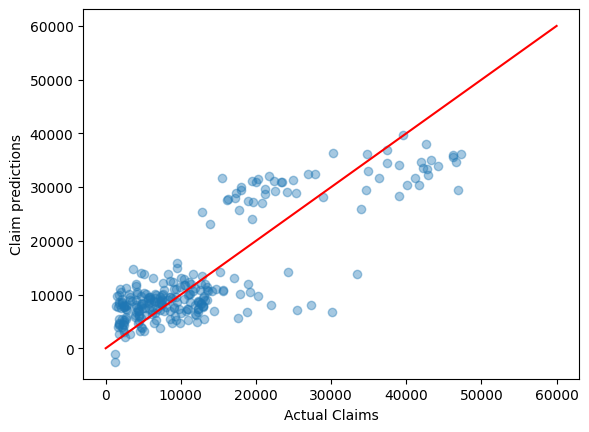

In [ ]:
plt.scatter(y_test,y_pred,alpha=0.4)
plt.plot([0,60000],[0,60000],color = "red")
plt.ylabel('Claim predictions')
plt.xlabel('Actual Claims')
plt.show()

In [ ]:
import joblib
joblib.dump(model, 'insurance_claims.joblib')

In [ ]:
x_train.to_csv("/content/x_train.csv", index = False)
y_train.to_csv("/content/y_train.csv", index = False)
x_test.to_csv("/content/x_test.csv", index = False)
y_test.to_csv("/content/y_test.csv", index = False)